### <div align="center"> **Stress distribution and displacement field in a 'C' frame structure having a symmetric force distribution**

Idea: To determine the stress distribution in a ‘C’ frame of a hydraulic portable riveter and to determine the displacement field generated due to the applied load. Motivation has been taken from the following numerical problem:

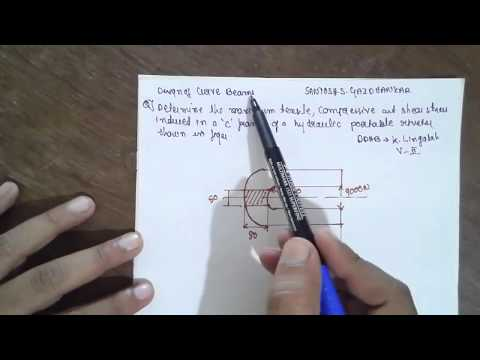

In [104]:
from IPython.display import YouTubeVideo
YouTubeVideo('FXKL9d1WI0M')

Assumption and modelling: We are considering a C frame with minimal thickness. We are using the method of superposition to solve our problem. We are seperating the rectangular part and the circular part.For rectangular part we are using rectangular coordinates and for circular we are using polar coordinates. In circular parts we are using pure bending and pure shear results in our problems.

<img src="C-Frame.jpg" width="350"/>

###### We have taken help of the following research paper:
Elasticity solutions for orthotropic functionally graded curved beams,Meiqin Wang, Yihua Liu, European Journal of Mechanics A/Solid,10.1016/j.euromechsol.2012.04.005







# <div align="center">Part1
## <div align="center">Pure shear subproblem.

<img src="Pure Shear.jpg" width="350"/>

At an angle $\theta$ from the central line, the horizontal load $P$ induces a moment proportional to $\sin \theta$. Since this bending moment is directly connected to $\sigma_{\theta\theta}$, so it must be true that $\sigma_{\theta\theta}$ must also be proportional to $\cos \theta$. Hence the Airy stress function follows:

In [105]:
from polarUtilities import *
from IPython.display import Math, Latex
import sympy as sym

In [106]:
g= sym.Function('g')(r)
f1=g*sym.cos(theta)
eq= sym.Eq(polarbiharmonic(f1),0)
sym.dsolve(eq)

Eq(g(r), C1/r + C2*r + C3*r**3 + C4*r*log(r))

In [107]:
A,B,C,D =sym.symbols('A,B,C,D')
phi=(A*r*sym.log(r)+B*r**3+C*r+D/r)*sym.cos(theta)
display(Math(r'\phi(r,\theta)={}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

In [108]:
sigmarr_shear=sigma_rr(phi)
sigmatt_shear=sigma_tt(phi)
sigmart_shear=sigma_rt(phi)

display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr_shear))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sym.latex(sigmarr_shear))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart_shear))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>
<br>





**<div align = "center">Here are the Boundary Condition for pure shear case**<br>
    At,  r = a $\;\;$ $\sigma_r{_r}=0$ $\;\;$ $\sigma_\theta{_\theta}=0$ <br>
       $\;\;\;\;$ r = b$\;\;$ <nbsp> $\sigma_r{_r}=0$ $\;\;$  $\sigma_\theta{_\theta}=0$<br><br>
    At$\;\;$$\theta=\pi/2$$\;\;$ $\int_{a}^{b} \sigma_\theta{_\theta}\,dr =0$<br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_\theta{_\theta}*r\,dr =0$<br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_r{_\theta}\,dr =p$<br><br>
           At$\;\;$$\theta=-\pi/2$$\;\;$ $\int_{a}^{b} \sigma_\theta{_\theta}\,dr =0$<br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_\theta{_\theta}*r\,dr =0$<br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_r{_\theta}\,dr =-p$<br><br>

In [109]:
a,b,p,l= sym.symbols('a,b,p,l')
lhs1 = sigmarr_shear.subs(r,a)
rhs1 = 0
eq1 = sym.Eq(lhs1,rhs1)


lhs2 = sigmarr_shear.subs(r,b)
rhs2 = 0
eq2 = sym.Eq(lhs2,rhs2)


lhs3 = sym.integrate(sigmatt_shear.subs(theta,sym.pi/2),(r,a,b))
rhs3 = 0
eq3 =(sym.Eq(lhs3,rhs3)).simplify()


lhs4 = sym.integrate(sigmatt_shear.subs(theta,sym.pi/2)*r,(r,a,b))
rhs4 = 0
eq4 = (sym.Eq(lhs4,rhs4)).simplify()



lhs5 = sym.integrate(sigmart_shear.subs(theta,sym.pi/2),(r,a,b))
rhs5 = p
eq5 = (sym.Eq(lhs5,rhs5)).simplify()


lhs6 = sym.integrate(sigmatt_shear.subs(theta,-sym.pi/2),(r,a,b))
rhs6 = 0
eq6 =(sym.Eq(lhs6,rhs6)).simplify()


lhs7 = sym.integrate(sigmatt_shear.subs(theta,-sym.pi/2)*r,(r,a,b))
rhs7 = 0
eq7 = (sym.Eq(lhs7,rhs7)).simplify()



lhs8 = sym.integrate(sigmart_shear.subs(theta,-sym.pi/2),(r,a,b))
rhs8 = -p
eq8 = (sym.Eq(lhs8,rhs8)).simplify()


display(Math(r'eq1 => {}'.format(sym.latex(eq1))))
display(Math(r'eq2 => {}'.format(sym.latex(eq2))))
display(Math(r'eq3 => {}'.format(sym.latex(eq3))))
display(Math(r'eq4 => {}'.format(sym.latex(eq4))))
display(Math(r'eq5 => {}'.format(sym.latex(eq5))))
display(Math(r'eq6 => {}'.format(sym.latex(eq6))))
display(Math(r'eq7 => {}'.format(sym.latex(eq7))))
display(Math(r'eq8 => {}'.format(sym.latex(eq8))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [110]:
soln_shear, = sym.linsolve([eq1,eq2,eq5,eq8],[A,B,D])

In [111]:
Asoln=soln_shear[0]
Bsoln=soln_shear[1]
Dsoln=soln_shear[2]
display(Math(r'A = {}'.format(sym.latex(Asoln))))
display(Math(r'B = {}'.format(sym.latex(Bsoln))))
display(Math(r'D = {}'.format(sym.latex(Dsoln))))

sigmarr_shear_final = sigmarr_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln)])
sigmatt_shear_final = sigmatt_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln)])
sigmart_shear_final = sigmart_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln)])


display(Math(r'\sigma rr_{{final}}{{shear}} = {}'.format(sym.latex(sigmarr_shear_final))))
display(Math(r'\sigma tt_{{final}}{{shear}} = {}'.format(sym.latex(sigmatt_shear_final))))
display(Math(r'\sigma rt_{{final}}{{shear}} = {}'.format(sym.latex(sigmart_shear_final))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Solving for displacement function

In [112]:
E,nu = sym.symbols('E,nu')
ep_rr_shear= 1/E *(sigmarr_shear-nu*sigmatt_shear)
ep_tt_shear= 1/E *(sigmatt_shear-nu*sigmarr_shear)
ep_rt_shear= (1+nu)/E*sigmart_shear

display(Math(r'\epsilon_{{rr}}{{shear}} = {}'.format(sym.latex(ep_rr_shear))))
display(Math(r'\epsilon_{{\theta\theta}}{{shear}} = {}'.format(sym.latex(ep_tt_shear))))
display(Math(r'\epsilon_{{r\theta}}{{shear}} = {}'.format(sym.latex(ep_rt_shear))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [113]:
u=sym.Function('u')(r,theta)
lhs=sym.diff(u,r)
rhs=ep_rr_shear
eq=sym.Eq(lhs,rhs)
f1=sym.Function('f_1')
sol=sym.pdsolve(eq,solvefun=f1)
sol

Eq(u(r, theta), (D*nu*cos(theta) + D*cos(theta) + E*r**2*f_1(-theta) + r**2*(-A*(nu - 1)*log(r) + B*r**2*(1 - 3*nu))*cos(theta))/(E*r**2))

In [114]:
u_interim_shear=sol.rhs.expand().collect(A).collect(B).collect(C)

display(Math(r'u_{{interim}}{{shear}} = {}'.format(sym.latex(u_interim_shear))))

<IPython.core.display.Math object>

In [115]:
v=sym.Function('v')(r,theta)
lhs=sym.diff(v,theta)
rhs=r*ep_tt_shear-u_interim_shear
eq=sym.Eq(lhs,rhs)
f2=sym.Function('f_2')
sol2=sym.pdsolve(eq,solvefun=f2)
sol2

Eq(v(r, theta), A*nu*log(r)*sin(theta)/E - A*nu*sin(theta)/E - A*log(r)*sin(theta)/E + A*sin(theta)/E + B*nu*r**2*sin(theta)/E + 5*B*r**2*sin(theta)/E + D*nu*sin(theta)/(E*r**2) + D*sin(theta)/(E*r**2) + f_2(r) - Integral(f_1(-xi), (xi, theta)))

In [116]:
v_interim_shear=sol2.rhs

display(Math(r'v_{{interim}}{{shear}} = {}'.format(sym.latex(v_interim_shear))))

<IPython.core.display.Math object>

In [117]:
lhs=1/r*sym.diff(u_interim_shear,theta)+sym.diff(v_interim_shear,r)-v_interim_shear/r-2*ep_rt_shear
rhs=0
eq=sym.Eq(lhs,rhs)
eq.simplify()

Eq(4*A*sin(theta)/(E*r) - Derivative(f_2(r), r) + f_2(r)/r - Integral(f_1(-xi), (xi, theta))/r + Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -theta)/r, 0)

In [118]:
ft=sym.Function('f_t')(theta)
lhs = -sym.diff(ft,(theta,2))+ft+4*A*sym.cos(theta)/E
rhs=0
eq=sym.Eq(lhs,rhs)
eq

Eq(4*A*cos(theta)/E + f_t(theta) - Derivative(f_t(theta), (theta, 2)), 0)

In [119]:
ft = sym.dsolve(eq)
ft

Eq(f_t(theta), -2*A*cos(theta)/E + C1*exp(-theta) + C2*exp(theta))

In [120]:
C1,C2,C3 = sym.symbols('C_1,C_2,C_3')
ft_final = C1*sym.exp(-theta) + C2*sym.exp(theta) - 2*A*sym.cos(theta)/E
ft_final
display(Math(r'ft_{{final}} = {}'.format(sym.latex(ft_final))))

<IPython.core.display.Math object>

In [121]:
u_final_shear = u_interim_shear.subs(f1(-theta),ft_final)
u_final_shear
display(Math(r'u_{{final}}{{shear}} = {}'.format(sym.latex(u_final_shear))))

<IPython.core.display.Math object>

In [122]:
fr_final = C3*r
v_final_shear = v_interim_shear.subs(f2(r),fr_final)
v_final_shear
display(Math(r'v_{{final}}{{shear}} = {}'.format(sym.latex(v_final_shear))))

<IPython.core.display.Math object>

In [123]:
v_final_shear = A*nu*sym.log(r)*sym.sin(theta)/E - A*nu*sym.sin(theta)/E - A*sym.log(r)*sym.sin(theta)/E + A*sym.sin(theta)/E + B*nu*r**2*sym.sin(theta)/E + B*5*r**2*sym.sin(theta)/E + D*nu*sym.sin(theta)/(E*r**2) + D*sym.sin(theta)/(E*r**2) + fr_final - sym.integrate(ft_final,theta)


display(Math(r'u_{{final}}{{shear}} = {}'.format(sym.latex(u_final_shear))))
display(Math(r'v_{{final}}{{shear}} = {}'.format(sym.latex(v_final_shear))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

###### Boundary conditions for displacement:

As we could not find any specific boundary conditions for displacement from any of the materials supplemented online, we have taken centre line to be fixed end and moved forward for solution of the unknown constants. 

At$\;\;$ r = $\frac{a+b}{2}$ and   $ \theta =0$ $ : \;\;\;$ $u=0,$$\;\;\;$ $v=0,$ $\;\;\;$ $\frac{\partial v}{\partial r}=0$

In [124]:
lhs1 = u_final_shear.subs([(r,(a+b)/2),(theta,0)])
rhs1 = 0
eq1 = sym.Eq(lhs1,rhs1)
lhs2 = v_final_shear.subs([(r,(a+b)/2),(theta,0)])
rhs2 = 0
eq2 = sym.Eq(lhs2,rhs2)
lhs3 = sym.diff(v_final_shear,r).subs([(r,(a+b)/2),(theta,0)])
rhs3 = 0
eq3 = sym.Eq(lhs3,rhs3)
display(eq1,eq2,eq3)

Eq(A*(-nu*log(a/2 + b/2)/E + log(a/2 + b/2)/E) - 2*A/E + B*(-3*nu*(a/2 + b/2)**2/E + (a/2 + b/2)**2/E) + C_1 + C_2 + D*nu/(E*(a/2 + b/2)**2) + D/(E*(a/2 + b/2)**2), 0)

Eq(C_1 - C_2 + C_3*(a/2 + b/2), 0)

Eq(C_3, 0)

In [125]:
soln1, = sym.linsolve([eq1,eq2,eq3],[C1,C2,C3])
C1soln = soln1[0].subs([(A,Asoln),(B,Bsoln),(D,Dsoln)]) 
C2soln = soln1[1].subs([(A,Asoln),(B,Bsoln),(D,Dsoln)]) 
C3soln = soln1[2].subs([(A,Asoln),(B,Bsoln),(D,Dsoln)]) 

display(Math(r'C1 = {}'.format(sym.latex(C1soln))))
display(Math(r'C2 = {}'.format(sym.latex(C2soln))))
display(Math(r'C3 = {}'.format(sym.latex(C3soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [126]:
v_final_shearsoln = v_final_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln),(C1,C1soln),(C2,C2soln),(C3,C3soln)]).simplify()
u_final_shearsoln = u_final_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln),(C1,C1soln),(C2,C2soln),(C3,C3soln)]).simplify()

display(Math(r'u_{{final}}{{shearsoln}} = {}'.format(sym.latex(u_final_shearsoln))))
display(Math(r'v_{{final}}{{shearsoln}} = {}'.format(sym.latex(v_final_shearsoln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# <div align="center">Part2
## <div align="center">Pure bending subproblem

<img src="Pure bending.jpg" width="350"/>

In [127]:
phi= sym.Function('phi')(r)
polarbiharmonic(phi)
eq= sym.Eq(polarbiharmonic(phi),0)
sym.dsolve(eq)

Eq(phi(r), C1 + C2*r**2 + C3*r**2*log(r) + C4*log(r))

In [128]:
W,X,Y,Z =sym.symbols('W,X,Y,Z')
phi= W*sym.log(r)+X*r**2*sym.log(r)+Y*r**2+Z

In [129]:
sigmarr_bend=sigma_rr(phi)
sigmatt_bend=sigma_tt(phi)
sigmart_bend=sigma_rt(phi)
display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr_bend))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sym.latex(sigmarr_bend))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart_bend))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>
<br>

**<div align = "center">Here are the Boundary Conditions for pure bending case**<br>
    At,r=a $\;\;$ $\sigma_r{_r}=0$ $\;\;$ $\sigma_\theta{_\theta}=0$ <br>
       $\;\;\;$ r=b$\;\;$ <nbsp> $\sigma_r{_r}=0$ $\;\;$  $\sigma_\theta{_\theta}=0$<br><br>
    $\;\;\;\;\;$ $\int_{a}^{b} \sigma_\theta{_\theta}\,dr =0$<br>
         $\;\;\;\;$ $\int_{a}^{b} \sigma_\theta{_\theta}*r\,dr =-p*l$<br>
         

In [130]:
lhs1 = sigmarr_bend.subs(r,a)
rhs1 = 0
eq1 = sym.Eq(lhs1,rhs1)


lhs2 = sigmarr_bend.subs(r,b)
rhs2 = 0
eq2 = sym.Eq(lhs2,rhs2)


lhs3 = sym.integrate(sigmatt_bend,(r,a,b))
rhs3 = 0
eq3 =sym.Eq(lhs3,rhs3)


lhs4 = sym.integrate(sigmatt_bend*r,(r,a,b))
rhs4 = -p*l
eq4 = sym.Eq(lhs4,rhs4)

display(Math(r'eq1 = {}'.format(sym.latex(eq1))))
display(Math(r'eq2 = {}'.format(sym.latex(eq2))))
display(Math(r'eq3 = {}'.format(sym.latex(eq3))))
display(Math(r'eq4 = {}'.format(sym.latex(eq4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [131]:
soln, = sym.linsolve([eq1,eq2,eq3,eq4],[W,X,Y])
soln

(4*a**2*b**2*l*p*(log(a) - log(b))/(a**4 - 4*a**2*b**2*log(a)**2 + 8*a**2*b**2*log(a)*log(b) - 4*a**2*b**2*log(b)**2 - 2*a**2*b**2 + b**4), 2*l*p*(a**2 - b**2)/(a**4 - 4*a**2*b**2*log(a)**2 + 8*a**2*b**2*log(a)*log(b) - 4*a**2*b**2*log(b)**2 - 2*a**2*b**2 + b**4), -l*p*(2*a**2*log(a) + a**2 - 2*b**2*log(b) - b**2)/(a**4 - 4*a**2*b**2*log(a)**2 + 8*a**2*b**2*log(a)*log(b) - 4*a**2*b**2*log(b)**2 - 2*a**2*b**2 + b**4))

In [132]:
Wsoln=soln[0]
Xsoln=soln[1]
Ysoln=soln[2]
display(Math(r'W = {}'.format(sym.latex(Wsoln))))
display(Math(r'X = {}'.format(sym.latex(Xsoln))))
display(Math(r'Y = {}'.format(sym.latex(Ysoln))))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [133]:
ep_rr_bend= 1/E *(sigmarr_bend-nu*sigmatt_bend)
ep_tt_bend= 1/E *(sigmatt_bend-nu*sigmarr_bend)
ep_rt_bend= (1+nu)/E*sigmart_bend

display(Math(r'\epsilon_{{rr}}{{bending}} = {}'.format(sym.latex(ep_rr_bend))))
display(Math(r'\epsilon_{{\theta\theta}}{{bending}} = {}'.format(sym.latex(ep_tt_bend))))
display(Math(r'\epsilon_{{r\theta}}{{bending}} = {}'.format(sym.latex(ep_rt_bend))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [134]:
u=sym.Function('u')(r,theta)
lhs=sym.diff(u,r)
rhs=ep_rr_bend
eq=sym.Eq(lhs,rhs)
f1=sym.Function('f_1')
sol=sym.pdsolve(eq,solvefun=f1)
sol

Eq(u(r, theta), (E*r*f_1(-theta) - W*nu - W - 2*X*r**2*(nu - 1)*log(r) + r**2*(-X*nu - X - 2*Y*nu + 2*Y))/(E*r))

In [135]:
u_interim_bend=sol.rhs.expand().collect(A).collect(B).collect(C)
u_interim_bend
display(Math(r'u_{{interim}}{{bending}} = {}'.format(sym.latex(u_interim_bend))))

<IPython.core.display.Math object>

In [136]:
v=sym.Function('v')(r,theta)
lhs=sym.diff(v,theta)
rhs=r*ep_tt_bend-u_interim_bend
eq=sym.Eq(lhs,rhs)
f2=sym.Function('f_2')
sol2=sym.pdsolve(eq,solvefun=f2)
sol2

Eq(v(r, theta), f_2(r) - Integral(f_1(-xi), (xi, theta)) + 4*X*r*theta/E)

In [137]:
v_interim_bend=sol2.rhs
v_interim_bend
display(Math(r'v_{{interim}}{{bending}} = {}'.format(sym.latex(v_interim_bend))))

<IPython.core.display.Math object>

In [138]:
lhs=1/r*sym.diff(u_interim_bend,theta)+sym.diff(v_interim_bend,r)-v_interim_bend/r
rhs=0
eq=sym.Eq(lhs,rhs)
eq.simplify()

Eq((r*Derivative(f_2(r), r) - f_2(r) + Integral(f_1(-xi), (xi, theta)) - Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -theta))/r, 0)

In [139]:
fr=sym.Function('f_r')(r)
lhs=sym.diff(fr,r)-fr/r
rhs=0
eq=sym.Eq(lhs,rhs)
eq


Eq(Derivative(f_r(r), r) - f_r(r)/r, 0)

In [140]:
sym.dsolve(eq)

Eq(f_r(r), C1*r)

In [141]:
H=sym.symbols('H')
fr=H*r
fr
display(Math(r'f_{{r}} = {}'.format(sym.latex(fr))))

<IPython.core.display.Math object>

In [142]:
ft=sym.Function('f_t')(theta)
lhs=sym.diff(ft,(theta,2))+ft
rhs=0
eq=sym.Eq(lhs,rhs)
eq

Eq(f_t(theta) + Derivative(f_t(theta), (theta, 2)), 0)

In [143]:
sym.dsolve(eq)


Eq(f_t(theta), C1*sin(theta) + C2*cos(theta))

In [144]:
F,G=sym.symbols('F,G')
ft=F*sym.sin(theta)+G*sym.cos(theta)
ft
display(Math(r'f_{{t}} = {}'.format(sym.latex(ft))))

<IPython.core.display.Math object>

In [145]:
u_final_bend = u_interim_bend.subs(f1(-theta),ft)
u_final_bend
display(Math(r'u_{{final}}{{bend}} = {}'.format(sym.latex(u_final_bend))))

<IPython.core.display.Math object>

In [146]:
v_final_bend = 4*B*r*theta/E + fr - sym.integrate(ft,theta)
v_final_bend
display(Math(r'v_{{final}}{{bend}} = {}'.format(sym.latex(v_final_bend))))

<IPython.core.display.Math object>

#### Boundary Condition for pure bending displacement

As we could not find any specific boundary conditions for displacement from any of the materials supplemented online, we have taken centre line to be fixed end and moved forward for solution of the unknown constants. 

At$\;\;\;$r=$\frac{a+b}{2}$and $\theta =0$ $\;\;\;$ $u=0$$\;\;\;$ $v=0$ $\;\;\;$ $\frac{\partial v}{\partial r}=0$

In [147]:
lhs = u_final_bend.subs([(theta,0),(r,(a+b)/2)])
rhs = 0
eq1 = sym.Eq(lhs,rhs)

lhs = v_final_bend.subs([(theta,0),(r,(a+b)/2)])
rhs = 0
eq2 = sym.Eq(lhs,rhs)


lhs = sym.diff(v_final_bend,r).subs([(theta,0),(r,(a+b)/2)])
rhs = 0
eq3 = sym.Eq(lhs,rhs)

display(eq1,eq2,eq3)

Eq(G - W*nu/(E*(a/2 + b/2)) - W/(E*(a/2 + b/2)) - 2*X*nu*(a/2 + b/2)*log(a/2 + b/2)/E - X*nu*(a/2 + b/2)/E + 2*X*(a/2 + b/2)*log(a/2 + b/2)/E - X*(a/2 + b/2)/E - 2*Y*nu*(a/2 + b/2)/E + 2*Y*(a/2 + b/2)/E, 0)

Eq(F + H*(a/2 + b/2), 0)

Eq(H, 0)

In [148]:
soln1,= sym.linsolve([eq1,eq2,eq3],[H,F,G])
soln1

(0, 0, (2*W*(nu + 1) + (a + b)*(2*X*a*nu*log(a/2 + b/2) + X*a*nu - 2*X*a*log(a/2 + b/2) + X*a + 2*X*b*nu*log(a/2 + b/2) + X*b*nu - 2*X*b*log(a/2 + b/2) + X*b + 2*Y*a*nu - 2*Y*a + 2*Y*b*nu - 2*Y*b)/2)/(E*(a + b)))

In [149]:
Hsoln=soln1[0].subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln)])
Fsoln=soln1[1].subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln)])
Gsoln=soln1[2].subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln)])

In [150]:
u_final_bendsoln=(u_final_bend.subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln),(H,Hsoln),(F,Fsoln),(G,Gsoln)])).simplify()
v_final_bendsoln=(u_final_bend.subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln),(H,Hsoln),(F,Fsoln),(G,Gsoln)])).simplify()


display(Math(r'u_{{final}}{{bendsoln}} = {}'.format(sym.latex(u_final_bendsoln))))
display(Math(r'v_{{final}}{{bendsoln}} = {}'.format(sym.latex(v_final_bendsoln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### Now we superimpose the pure shear and pure bending displacement solution

In [151]:
u_final_soln = u_final_shearsoln + u_final_bendsoln
v_final_soln = v_final_shearsoln + v_final_bendsoln

display(Math(r'u_{{final}}{{soln}} = {}'.format(sym.latex(u_final_soln))))
display(Math(r'v_{{final}}{{soln}} = {}'.format(sym.latex(v_final_soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>
<br>

# <div align = "center"> Part3
## <div align = "center"> Rectangular part of subproblem

<img src="Rectangular.jpg" width="350"/>

In [152]:
x, y= sym.symbols('x,y')

A20, A11, A02 = sym.symbols('A_20,A_11,A_02')
airy2= A20*x**2+A11*x*y+A02*y**2
# display(airy2)

A30,A21,A12,A03= sym.symbols('A_30,A_21,A_12,A_03')
airy3=A30*x**3+A21*x**2*y+A12*x*y**2+A03*y**3
# display(airy3)

A40,A31,A22,A13,A04= sym.symbols('A_40,A_31,A_22,A_13,A_04')
airy4=A40*x**4+A31*x**3*y+A22*x**2*y**2+A13*x*y**3+A04*y**4
# display(airy4)

A50,A41,A32,A23,A14,A05= sym.symbols('A_50,A_41,A_32,A_23,A_14,A_05')
airy5=A50*x**5+A41*x**4*y+A32*x**3*y**2+A23*x**2*y**3+A14*x*y**4+A05*y**5
# display(airy5)

phi= airy2+airy3+airy4+airy5
#display(phi)
display(Math(r'\phi{{(x,y)}} = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

In [153]:
biharm=(sym.diff(phi,(x,4))+2*sym.diff(phi,x,x,y,y)+sym.diff(phi,(y,4))).expand()
#display(biharm)
display(Math(r'\nabla^{{4}}\phi = {}'.format(sym.latex(biharm))))

<IPython.core.display.Math object>

In [154]:
biharm_x=biharm.coeff(x)
cond1=sym.Eq(biharm_x.subs(y,0),0)

biharm_y=biharm.coeff(y)
cond2=sym.Eq(biharm_y.subs(x,0),0)

biharm_0=biharm.subs([(x,0),(y,0)])
cond3=sym.Eq(biharm_0,0)
display(cond1,cond2,cond3)

Eq(24*A_14 + 24*A_32 + 120*A_50, 0)

Eq(120*A_05 + 24*A_23 + 24*A_41, 0)

Eq(24*A_04 + 8*A_22 + 24*A_40, 0)

In [155]:
sigmaxx_rect=(sym.diff(phi,(y,2))).expand()
sigmayy_rect=(sym.diff(phi,(x,2))).expand()
sigmaxy_rect= -(sym.diff(phi,x,y)).expand()
#display(sigmaxx_rect,sigmayy_rect,sigmaxy_rect)
display(Math(r'\sigma_{{xx}} = {}'.format(sym.latex(sigmaxx_rect))))
display(Math(r'\sigma_{{yy}} = {}'.format(sym.latex(sigmayy_rect))))
display(Math(r'\sigma_{{xy}} = {}'.format(sym.latex(sigmaxy_rect))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>
<br>
<br>

### Boundary Conditions for rectangular stress  case

At $r=a$ $\;\;$ $\sigma _x{_x}=0$ $\;\;$ $\sigma _x{_y}=0$ <br>
$\;\;\;\;$r=b$\;\;\;\;\;\;$  $\sigma_x{_x}=0$ $\;\;$  $\sigma_x{_y}=0$<br><br>
At$\;\;$$x=0$$\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_x{_x}\,dy =0$<br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_x{_x}*y\,dy =-p*l$<br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_x{_y}\,dy =p$<br><br>
           At$\;\;$$x=l$$\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_x{_x}\,dy =0$<br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_x{_x}*y\,dy =0$<br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $\int_{a}^{b} \sigma_x{_y}\,dy =p$<br><br>
      

In [156]:
t1= sigmayy_rect.subs(y,a)
t2= sigmaxy_rect.subs(y,a)
display(t1,t2)

2*A_20 + 2*A_21*a + 2*A_22*a**2 + 2*A_23*a**3 + 6*A_30*x + 6*A_31*a*x + 6*A_32*a**2*x + 12*A_40*x**2 + 12*A_41*a*x**2 + 20*A_50*x**3

-A_11 - 2*A_12*a - 3*A_13*a**2 - 4*A_14*a**3 - 2*A_21*x - 4*A_22*a*x - 6*A_23*a**2*x - 3*A_31*x**2 - 6*A_32*a*x**2 - 4*A_41*x**3

In [157]:
bc1= sym.Eq(t1.coeff(x),0)
bc2= sym.Eq(t1.coeff(x**2),0)
bc3= sym.Eq(t1.coeff(x**3),0)
bc4= sym.Eq(t1.subs(x,0),0)


display(bc1,bc2,bc3,bc4)


Eq(6*A_30 + 6*A_31*a + 6*A_32*a**2, 0)

Eq(12*A_40 + 12*A_41*a, 0)

Eq(20*A_50, 0)

Eq(2*A_20 + 2*A_21*a + 2*A_22*a**2 + 2*A_23*a**3, 0)

In [158]:
bc5= sym.Eq(t2.coeff(x),0)
bc6= sym.Eq(t2.coeff(x**2),0)
bc7= sym.Eq(t2.coeff(x**3),0)
bc8= sym.Eq(t2.subs(x,0),0)
display(bc5,bc6,bc7,bc8)

Eq(-2*A_21 - 4*A_22*a - 6*A_23*a**2, 0)

Eq(-3*A_31 - 6*A_32*a, 0)

Eq(-4*A_41, 0)

Eq(-A_11 - 2*A_12*a - 3*A_13*a**2 - 4*A_14*a**3, 0)

In [159]:
t3= sigmayy_rect.subs(y,b)
t4= sigmaxy_rect.subs(y,b)
display(t3,t4)

2*A_20 + 2*A_21*b + 2*A_22*b**2 + 2*A_23*b**3 + 6*A_30*x + 6*A_31*b*x + 6*A_32*b**2*x + 12*A_40*x**2 + 12*A_41*b*x**2 + 20*A_50*x**3

-A_11 - 2*A_12*b - 3*A_13*b**2 - 4*A_14*b**3 - 2*A_21*x - 4*A_22*b*x - 6*A_23*b**2*x - 3*A_31*x**2 - 6*A_32*b*x**2 - 4*A_41*x**3

In [160]:
bc9= sym.Eq(t3.coeff(x),0)
bc10= sym.Eq(t3.coeff(x**2),0)
bc11= sym.Eq(t3.coeff(x**3),0)
bc12= sym.Eq(t3.subs(x,0),0)
display(bc9,bc10,bc11,bc12)

Eq(6*A_30 + 6*A_31*b + 6*A_32*b**2, 0)

Eq(12*A_40 + 12*A_41*b, 0)

Eq(20*A_50, 0)

Eq(2*A_20 + 2*A_21*b + 2*A_22*b**2 + 2*A_23*b**3, 0)

In [161]:

bc13= sym.Eq(t4.coeff(x),0)
bc14= sym.Eq(t4.coeff(x**2),0)
bc15= sym.Eq(t4.coeff(x**3),0)
bc16= sym.Eq(t4.subs(x,0),0)
display(bc13,bc14,bc15,bc16)

Eq(-2*A_21 - 4*A_22*b - 6*A_23*b**2, 0)

Eq(-3*A_31 - 6*A_32*b, 0)

Eq(-4*A_41, 0)

Eq(-A_11 - 2*A_12*b - 3*A_13*b**2 - 4*A_14*b**3, 0)

In [162]:
t5= sigmaxx_rect.subs(x,0)
t6= sigmaxy_rect.subs(x,0)
display(t5,t6)

2*A_02 + 6*A_03*y + 12*A_04*y**2 + 20*A_05*y**3

-A_11 - 2*A_12*y - 3*A_13*y**2 - 4*A_14*y**3

In [163]:
Fx1= sym.integrate(t5,(y,a,b))

Mx1= sym.integrate(t5*y,(y,a,b))

Vx1= sym.integrate(t6,(y,a,b))
#display(Fx1,Mx1,Vx1)
display(Math(r'F_{{x1}}={}'.format(sym.latex(Fx1))))
display(Math(r'M_{{x1}}={}'.format(sym.latex(Mx1))))
display(Math(r'V_{{x1}}={}'.format(sym.latex(Vx1))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [164]:
bc17= sym.Eq(Fx1,0)
bc18= sym.Eq(Mx1,-p*l)
bc19= sym.Eq(Vx1,p)
display(bc17,bc18,bc19)

Eq(-2*A_02*a + 2*A_02*b - 3*A_03*a**2 + 3*A_03*b**2 - 4*A_04*a**3 + 4*A_04*b**3 - 5*A_05*a**4 + 5*A_05*b**4, 0)

Eq(-A_02*a**2 + A_02*b**2 - 2*A_03*a**3 + 2*A_03*b**3 - 3*A_04*a**4 + 3*A_04*b**4 - 4*A_05*a**5 + 4*A_05*b**5, -l*p)

Eq(A_11*a - A_11*b + A_12*a**2 - A_12*b**2 + A_13*a**3 - A_13*b**3 + A_14*a**4 - A_14*b**4, p)

In [165]:
t7= sigmaxx_rect.subs(x,l)
t8= sigmaxy_rect.subs(x,l)
display(t7,t8)


2*A_02 + 6*A_03*y + 12*A_04*y**2 + 20*A_05*y**3 + 2*A_12*l + 6*A_13*l*y + 12*A_14*l*y**2 + 2*A_22*l**2 + 6*A_23*l**2*y + 2*A_32*l**3

-A_11 - 2*A_12*y - 3*A_13*y**2 - 4*A_14*y**3 - 2*A_21*l - 4*A_22*l*y - 6*A_23*l*y**2 - 3*A_31*l**2 - 6*A_32*l**2*y - 4*A_41*l**3

In [166]:
Fx2= (sym.integrate(t7,(y,a,b))).expand()

Mx2= (sym.integrate(t7*y,(y,a,b))).expand()

Vx2= (sym.integrate(t8,(y,a,b))).expand()
#display(Fx2,Mx2,Vx2)
display(Math(r'F_{{x2}}={}'.format(sym.latex(Fx2))))
display(Math(r'M_{{x2}}={}'.format(sym.latex(Mx2))))
display(Math(r'V_{{x2}}={}'.format(sym.latex(Vx2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [167]:
bc20= sym.Eq(Fx2,0)
bc21= sym.Eq(Mx2,0)
bc22= sym.Eq(Vx2,p)
display(bc20,bc21,bc22)

Eq(-2*A_02*a + 2*A_02*b - 3*A_03*a**2 + 3*A_03*b**2 - 4*A_04*a**3 + 4*A_04*b**3 - 5*A_05*a**4 + 5*A_05*b**4 - 2*A_12*a*l + 2*A_12*b*l - 3*A_13*a**2*l + 3*A_13*b**2*l - 4*A_14*a**3*l + 4*A_14*b**3*l - 2*A_22*a*l**2 + 2*A_22*b*l**2 - 3*A_23*a**2*l**2 + 3*A_23*b**2*l**2 - 2*A_32*a*l**3 + 2*A_32*b*l**3, 0)

Eq(-A_02*a**2 + A_02*b**2 - 2*A_03*a**3 + 2*A_03*b**3 - 3*A_04*a**4 + 3*A_04*b**4 - 4*A_05*a**5 + 4*A_05*b**5 - A_12*a**2*l + A_12*b**2*l - 2*A_13*a**3*l + 2*A_13*b**3*l - 3*A_14*a**4*l + 3*A_14*b**4*l - A_22*a**2*l**2 + A_22*b**2*l**2 - 2*A_23*a**3*l**2 + 2*A_23*b**3*l**2 - A_32*a**2*l**3 + A_32*b**2*l**3, 0)

Eq(A_11*a - A_11*b + A_12*a**2 - A_12*b**2 + A_13*a**3 - A_13*b**3 + A_14*a**4 - A_14*b**4 + 2*A_21*a*l - 2*A_21*b*l + 2*A_22*a**2*l - 2*A_22*b**2*l + 2*A_23*a**3*l - 2*A_23*b**3*l + 3*A_31*a*l**2 - 3*A_31*b*l**2 + 3*A_32*a**2*l**2 - 3*A_32*b**2*l**2 + 4*A_41*a*l**3 - 4*A_41*b*l**3, p)

In [168]:
soln, = sym.linsolve([cond1,cond2,cond3,bc1,bc2,bc3,bc4,bc5,bc6,bc7,bc8,bc9,bc10,bc11,bc12,bc13,bc14,bc15,bc16,bc17,bc18,bc19,bc20,bc21,bc22],(A20,A11,A02,A30,A21,A12,A03,A40,A31,A22,A13,A04,A50,A41,A32,A23,A14,A05))
soln

(0, -6*a*b*p/(a**3 - 3*a**2*b + 3*a*b**2 - b**3), -3*l*p*(a + b)/(a**3 - 3*a**2*b + 3*a*b**2 - b**3), 0, 0, 3*p*(a + b)/(a**3 - 3*a**2*b + 3*a*b**2 - b**3), 2*l*p/(a**3 - 3*a**2*b + 3*a*b**2 - b**3), 0, 0, 0, -2*p/(a**3 - 3*a**2*b + 3*a*b**2 - b**3), 0, 0, 0, 0, 0, 0, 0)

In [169]:
A20_soln = soln[0]
A11_soln = soln[1]
A02_soln = soln[2]
A30_soln = soln[3]
A21_soln = soln[4]
A12_soln = soln[5]
A03_soln = soln[6]
A40_soln = soln[7]
A31_soln = soln[8]
A22_soln = soln[9]
A13_soln = soln[10]
A04_soln = soln[11]
A50_soln = soln[12]
A41_soln = soln[13]
A32_soln = soln[14]
A23_soln = soln[15]
A14_soln = soln[16]
A05_soln = soln[17]

In [170]:
sigmaxx_rectsoln = sigmaxx_rect.subs([(A20,A20_soln),(A11,A11_soln),(A02,A02_soln),(A30,A30_soln),(A21,A21_soln),(A12,A12_soln),(A03,A03_soln),(A40,A40_soln),(A31,A31_soln),(A22,A22_soln),(A13,A13_soln),(A04,A04_soln),(A50,A50_soln),(A41,A41_soln),(A32,A32_soln),(A23,A23_soln),(A14,A14_soln),(A05,A05_soln)])

sigmayy_rectsoln = sigmayy_rect.subs([(A20,A20_soln),(A11,A11_soln),(A02,A02_soln),(A30,A30_soln),(A21,A21_soln),(A12,A12_soln),(A03,A03_soln),(A40,A40_soln),(A31,A31_soln),(A22,A22_soln),(A13,A13_soln),(A04,A04_soln),(A50,A50_soln),(A41,A41_soln),(A32,A32_soln),(A23,A23_soln),(A14,A14_soln),(A05,A05_soln)])

sigmaxy_rectsoln = sigmaxy_rect.subs([(A20,A20_soln),(A11,A11_soln),(A02,A02_soln),(A30,A30_soln),(A21,A21_soln),(A12,A12_soln),(A03,A03_soln),(A40,A40_soln),(A31,A31_soln),(A22,A22_soln),(A13,A13_soln),(A04,A04_soln),(A50,A50_soln),(A41,A41_soln),(A32,A32_soln),(A23,A23_soln),(A14,A14_soln),(A05,A05_soln)])


display(Math(r'\sigma_{{xx}}^{{\rm soln}} = {}'.format(sym.latex(sigmaxx_rectsoln))))
display(Math(r'\sigma_{{yy}}^{{\rm soln}} = {}'.format(sym.latex(sigmayy_rectsoln))))
display(Math(r'\sigma_{{xy}}^{{\rm soln}} = {}'.format(sym.latex(sigmaxy_rectsoln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>
<br>
<br>


##### Solving for displacement

In [171]:
ep_xx_rect = 1/E *(sigmaxx_rect-nu*sigmayy_rect)
ep_xy_rect = (1+nu)/E *sigmaxy_rect
ep_yy_rect = 1/E*(sigmayy_rect-nu*sigmaxx_rect)
display(Math(r'\varepsilon_{{xx}} = {}'.format(sym.latex(ep_xx_rect))))
display(Math(r'\varepsilon_{{yy}} = {}'.format(sym.latex(ep_yy_rect))))
display(Math(r'\varepsilon_{{xy}} = {}'.format(sym.latex(ep_xy_rect))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [172]:
x,y = sym.symbols('x,y')
u = sym.Function('u')(x,y)
lhs = sym.diff(u,x)
rhs = ep_xx_rect
eq = sym.Eq(lhs,rhs)
f1 = sym.Function('f_1')
sol1 = sym.pdsolve(eq,solvefun=f1)
sol1

Eq(u(x, y), (6*E*f_1(-y) + 3*x**4*(A_32 - 10*A_50*nu) + 4*x**3*(A_22 + 3*A_23*y - 6*A_40*nu - 6*A_41*nu*y) + 6*x**2*(A_12 + 3*A_13*y + 6*A_14*y**2 - 3*A_30*nu - 3*A_31*nu*y - 3*A_32*nu*y**2) + 12*x*(A_02 + 3*A_03*y + 6*A_04*y**2 + 10*A_05*y**3 - A_20*nu - A_21*nu*y - A_22*nu*y**2 - A_23*nu*y**3))/(6*E))

In [173]:
u_interim_rect = sol1.rhs.expand()
#u_interim_rect
display(Math(r'u_{{interim}}^{{rect}}={}'.format(sym.latex(u_interim_rect))))

<IPython.core.display.Math object>

In [174]:
v = sym.Function('v')(x,y)
lhs = sym.diff(v,y)
rhs = ep_yy_rect
eq = sym.Eq(lhs,rhs)
f2 = sym.Function('f_2')
sol2 = sym.pdsolve(eq,solvefun=f2)
sol2

Eq(v(x, y), (6*E*f_2(x) + 3*y**4*(-10*A_05*nu + A_23) + 4*y**3*(-6*A_04*nu - 6*A_14*nu*x + A_22 + 3*A_32*x) + 6*y**2*(-3*A_03*nu - 3*A_13*nu*x + A_21 - 3*A_23*nu*x**2 + 3*A_31*x + 6*A_41*x**2) - 12*y*(A_02*nu + A_12*nu*x - A_20 + A_22*nu*x**2 - 3*A_30*x + A_32*nu*x**3 - 6*A_40*x**2 - 10*A_50*x**3))/(6*E))

In [175]:
v_interim_rect = sol2.rhs.expand()
#v_interim_rect
display(Math(r'v_{{interim}}^{{rect}}={}'.format(sym.latex(v_interim_rect))))

<IPython.core.display.Math object>

In [176]:
lhs = 1/2 * (sym.diff(u_interim_rect,y) + sym.diff(v_interim_rect,x))-ep_xy_rect
eq = sym.Eq(lhs,0)
eq

Eq(3.0*A_03*x/E + 12.0*A_04*x*y/E + 30.0*A_05*x*y**2/E - 1.0*A_12*nu*y/E - 1.5*A_13*nu*y**2/E + 1.5*A_13*x**2/E - 2.0*A_14*nu*y**3/E + 6.0*A_14*x**2*y/E - 1.0*A_21*nu*x/E - 4.0*A_22*nu*x*y/E - 6.0*A_23*nu*x*y**2/E + 1.0*A_23*x**3/E + 3.0*A_30*y/E - 1.5*A_31*nu*x**2/E + 1.5*A_31*y**2/E - 6.0*A_32*nu*x**2*y/E + 1.0*A_32*y**3/E + 12.0*A_40*x*y/E - 2.0*A_41*nu*x**3/E + 6.0*A_41*x*y**2/E + 30.0*A_50*x**2*y/E + 0.5*Derivative(f_2(x), x) - 0.5*Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -y) - (nu + 1)*(-A_11 - 2*A_12*y - 3*A_13*y**2 - 4*A_14*y**3 - 2*A_21*x - 4*A_22*x*y - 6*A_23*x*y**2 - 3*A_31*x**2 - 6*A_32*x**2*y - 4*A_41*x**3)/E, 0)

In [177]:
eq = eq.subs([(A20,0),(A30,0),(A21,0),(A40,0),(A31,0),(A22,0),(A04,0),(A50,0),(A41,0),(A32,0),(A23,0),(A14,0),(A05,0)])
eq.simplify()

Eq((3.0*A_03*x - 1.0*A_12*nu*y - 1.5*A_13*nu*y**2 + 1.5*A_13*x**2 + 0.5*E*(Derivative(f_2(x), x) - Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -y)) + (nu + 1)*(A_11 + 2*A_12*y + 3*A_13*y**2))/E, 0)

In [178]:
eq

Eq(3.0*A_03*x/E - 1.0*A_12*nu*y/E - 1.5*A_13*nu*y**2/E + 1.5*A_13*x**2/E + 0.5*Derivative(f_2(x), x) - 0.5*Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -y) - (nu + 1)*(-A_11 - 2*A_12*y - 3*A_13*y**2)/E, 0)

In [179]:
eq1 = eq.lhs

In [180]:
coeff_y = eq1.coeff(y)
coeff_yy = eq1.coeff(y**2)
coeff_x = eq1.coeff(x)
coeff_xx = eq1.coeff(x**2)
const =eq1.subs([(x,0),(y,0)])
display(coeff_y,coeff_yy,coeff_x,coeff_xx,const)

-1.0*A_12*nu/E

-1.5*A_13*nu/E

3.0*A_03/E

1.5*A_13/E

A_11*(nu + 1)/E - 0.5*Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, 0) + 0.5*Subs(Derivative(f_2(x), x), x, 0)

In [181]:
fy = sym.Function('f_y')(y)
rhs4 = 2/E * ((nu+2) * (A12*y + A13*1.5*y**2) + A11*(nu+1))
lhs4 = -sym.diff(fy,y)
eq4 = sym.Eq(lhs4,rhs4)
eq4

Eq(-Derivative(f_y(y), y), 2*(A_11*(nu + 1) + (nu + 2)*(A_12*y + 1.5*A_13*y**2))/E)

In [182]:
sol3 = sym.dsolve(eq4)
sol3

Eq(f_y(y), C1 - y*(2*A_11*(nu + 1) + A_12*y*(nu + 2) + A_13*y**2*(nu + 2))/E)

In [183]:
M = sym.symbols('M')
fy = M - y*(2*A11*(nu+1)+A12*y*(nu+2)+A13*y**2*(nu+2))/E
fy = fy.simplify()
#fy
display(Math(r'f_{{y}}={}'.format(sym.latex(fy))))

<IPython.core.display.Math object>

In [184]:
fx = sym.Function('f_x')(x)
rhs5 = 2/E * (3*A03*x + 1.5*A13*x**2)
lhs5 = -sym.diff(fx,x)
eq5 = sym.Eq(lhs5,rhs5)
eq5

Eq(-Derivative(f_x(x), x), 2*(3*A_03*x + 1.5*A_13*x**2)/E)

In [185]:
sol4 = sym.dsolve(eq5)
sol4

Eq(f_x(x), C1 - 3*x**2*(A_03 + A_13*x/3)/E)

In [186]:
N = sym.symbols('N')
fx = N - 3*x**2*(A03 + A13*x/3)/E
fx = fx.simplify()
#fx
display(Math(r'f_{{x}}={}'.format(sym.latex(fx))))

<IPython.core.display.Math object>

In [187]:
u_interim_rect = u_interim_rect.subs([(A20,0),(A30,0),(A21,0),(A40,0),(A31,0),(A22,0),(A04,0),(A50,0),(A41,0),(A32,0),(A23,0),(A14,0),(A05,0)])
#u_interim_rect
display(Math(r'u_{{interim}}^{{rect}}={}'.format(sym.latex(u_interim_rect))))

<IPython.core.display.Math object>

In [188]:
u_final_rect = u_interim_rect.subs(f1(-y),fy)
#u_final_rect
display(Math(r'u_{{final}}^{{rect}}={}'.format(sym.latex(u_final_rect))))

<IPython.core.display.Math object>

In [189]:
v_interim_rect = v_interim_rect.subs([(A20,A20_soln),(A30,A30_soln),(A21,A21_soln),(A40,A40_soln),(A31,A31_soln),(A22,A22_soln),(A04,A04_soln),(A50,A50_soln),(A41,A41_soln),(A32,A32_soln),(A23,A23_soln),(A14,A14_soln),(A05,A05_soln)])
#v_interim_rect
display(Math(r'v_{{interim}}^{{rect}}={}'.format(sym.latex(v_interim_rect))))

<IPython.core.display.Math object>

In [190]:
v_final_rect = v_interim_rect.subs(f2(x),fx)
#v_final_rect
display(Math(r'v_{{final}}^{{rect}}={}'.format(sym.latex(v_final_rect))))

<IPython.core.display.Math object>

In [191]:
displacement_vec = [u_final_rect,v_final_rect]
#display(u_final_rect,v_final_rect)
display(Math(r'u_{{final}}^{{rect}}={}'.format(sym.latex(u_final_rect))))
display(Math(r'v_{{final}}^{{rect}}={}'.format(sym.latex(v_final_rect))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [192]:
lhs1 = -u_final_rect.subs([(x,0),(y,(a+b)/2)])
rhs1 = v_final_soln.subs([(r,(a+b)/2),(theta,-sym.pi/2)])
eq1 = sym.Eq(lhs1,rhs1)
lhs2 = v_final_rect.subs([(x,0),(y,(a+b)/2)])
rhs2 = u_final_soln.subs([(r,(a+b)/2),(theta,-sym.pi/2)])
eq2 = sym.Eq(lhs2,rhs2)
#display(eq1,eq2)
display(Math(r'eq1=>{}'.format(sym.latex(eq1))))
display(Math(r'eq2=>{}'.format(sym.latex(eq2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [193]:
M_N_sol, = sym.linsolve([eq1,eq2],[M,N])
display(Math(r'M={}'.format(sym.latex(M_N_sol[0]))))
display(Math(r'N={}'.format(sym.latex(M_N_sol[1]))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [194]:
M_soln = M_N_sol[0].subs([(A20,A20_soln),(A11,A11_soln),(A02,A02_soln),(A30,A30_soln),(A21,A21_soln),(A12,A12_soln),(A03,A03_soln),(A40,A40_soln),(A31,A31_soln),(A22,A22_soln),(A13,A13_soln),(A04,A04_soln),(A50,A50_soln),(A41,A41_soln),(A32,A32_soln),(A23,A23_soln),(A14,A14_soln),(A05,A05_soln)])
M_soln

(2*a*b*p*(9*a**4*nu - 35*a**4 + 9*b**4*nu - 35*b**4)*(-a**6 - 2*a**5*b + 4*a**4*b**2*log(a)**2 - 8*a**4*b**2*log(a)*log(b) + 4*a**4*b**2*log(b)**2 + a**4*b**2 + 8*a**3*b**3*log(a)**2 - 16*a**3*b**3*log(a)*log(b) + 8*a**3*b**3*log(b)**2 + 4*a**3*b**3 + 4*a**2*b**4*log(a)**2 - 8*a**2*b**4*log(a)*log(b) + 4*a**2*b**4*log(b)**2 + a**2*b**4 - 2*a*b**5 - b**6)*exp(pi) + 32*l*p*(a**6*log(a) - a**6*log(b) - a**6 + 4*a**5*b*log(a) - 4*a**5*b*log(b) - 4*a**5*b + 7*a**4*b**2*log(a) - 7*a**4*b**2*log(b) - 5*a**4*b**2 + 8*a**3*b**3*log(a) - 8*a**3*b**3*log(b) + 7*a**2*b**4*log(a) - 7*a**2*b**4*log(b) + 5*a**2*b**4 + 4*a*b**5*log(a) - 4*a*b**5*log(b) + 4*a*b**5 + b**6*log(a) - b**6*log(b) + b**6)*(a**5*nu*log(a) - a**5*nu*log(a/2 + b/2) - a**5*log(a) + a**5*log(a/2 + b/2) - a**5 + 3*a**4*b*nu*log(a) - 3*a**4*b*nu*log(a/2 + b/2) - 3*a**4*b*log(a) + 3*a**4*b*log(a/2 + b/2) - 3*a**4*b - a**3*b**2*nu*log(a) + 3*a**3*b**2*nu*log(b) - 2*a**3*b**2*nu*log(a/2 + b/2) - 7*a**3*b**2*log(a) + 5*a**3*b**2*log(b)

In [195]:
N_soln = M_N_sol[1].subs([(A20,A20_soln),(A11,A11_soln),(A02,A02_soln),(A30,A30_soln),(A21,A21_soln),(A12,A12_soln),(A03,A03_soln),(A40,A40_soln),(A31,A31_soln),(A22,A22_soln),(A13,A13_soln),(A04,A04_soln),(A50,A50_soln),(A41,A41_soln),(A32,A32_soln),(A23,A23_soln),(A14,A14_soln),(A05,A05_soln)])
N_soln

(2*a*b*p*(9*a**4*nu - 35*a**4 + 9*b**4*nu - 35*b**4)*(-a**6 - 2*a**5*b + 4*a**4*b**2*log(a)**2 - 8*a**4*b**2*log(a)*log(b) + 4*a**4*b**2*log(b)**2 + a**4*b**2 + 8*a**3*b**3*log(a)**2 - 16*a**3*b**3*log(a)*log(b) + 8*a**3*b**3*log(b)**2 + 4*a**3*b**3 + 4*a**2*b**4*log(a)**2 - 8*a**2*b**4*log(a)*log(b) + 4*a**2*b**4*log(b)**2 + a**2*b**4 - 2*a*b**5 - b**6)*exp(pi) + 2*a*b*p*(9*a**4*nu - 35*a**4 + 9*b**4*nu - 35*b**4)*(-a**6 - 2*a**5*b + 4*a**4*b**2*log(a)**2 - 8*a**4*b**2*log(a)*log(b) + 4*a**4*b**2*log(b)**2 + a**4*b**2 + 8*a**3*b**3*log(a)**2 - 16*a**3*b**3*log(a)*log(b) + 8*a**3*b**3*log(b)**2 + 4*a**3*b**3 + 4*a**2*b**4*log(a)**2 - 8*a**2*b**4*log(a)*log(b) + 4*a**2*b**4*log(b)**2 + a**2*b**4 - 2*a*b**5 - b**6)*exp(2*pi) + 32*l*p*(a**6*log(a) - a**6*log(b) - a**6 + 4*a**5*b*log(a) - 4*a**5*b*log(b) - 4*a**5*b + 7*a**4*b**2*log(a) - 7*a**4*b**2*log(b) - 5*a**4*b**2 + 8*a**3*b**3*log(a) - 8*a**3*b**3*log(b) + 7*a**2*b**4*log(a) - 7*a**2*b**4*log(b) + 5*a**2*b**4 + 4*a*b**5*log(a) - 4*a

In [196]:
sigmarr_shear_final = sigmarr_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln)])
sigmatt_shear_final = sigmatt_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln)])
sigmart_shear_final = sigmart_shear.subs([(A,Asoln),(B,Bsoln),(D,Dsoln)])

sigmarr_bend_final = sigmarr_bend.subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln)])
sigmart_bend_final = sigmart_bend.subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln)])
sigmatt_bend_final = sigmatt_bend.subs([(W,Wsoln),(X,Xsoln),(Y,Ysoln)])

<br>
<br>
<br>


### Now we add the stresses due to pure shear force and pure bending moment for the 'C' frame.

In [197]:
sigmarr_circ = sigmarr_shear_final + sigmarr_bend_final
sigmatt_circ = sigmatt_shear_final + sigmatt_bend_final
sigmart_circ = sigmart_shear_final + sigmart_bend_final
display(Math(r'\sigma_{{rr}}^{{circ}}={}'.format(sym.latex(sigmarr_circ))))
display(Math(r'\sigma_{{\theta\theta}}^{{circ}}={}'.format(sym.latex(sigmatt_circ))))
display(Math(r'\sigma_{{r\theta}}^{{circ}}={}'.format(sym.latex(sigmart_circ))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>
<br>
<br>

## Plotting the stress distributions:

In [198]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np

<br>
<br>
<br>

### For 'C' section

<IPython.core.display.Javascript object>


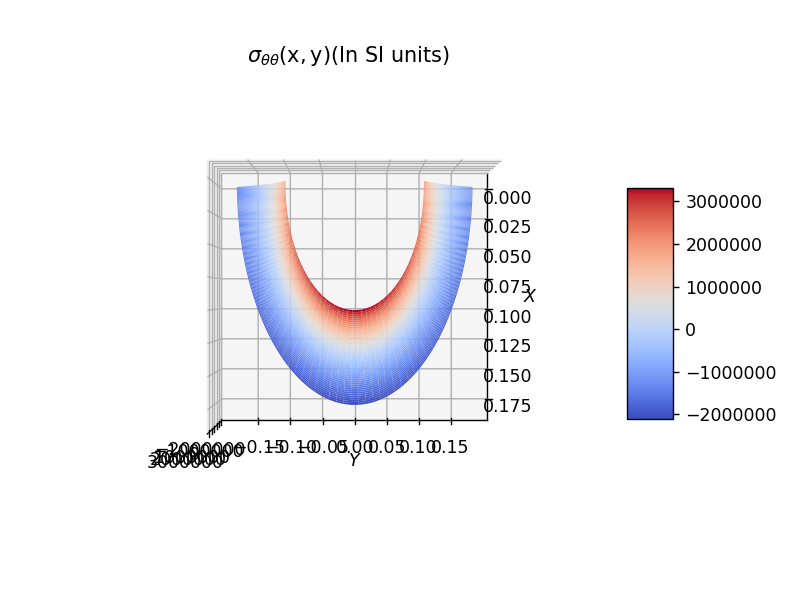

<IPython.core.display.Javascript object>


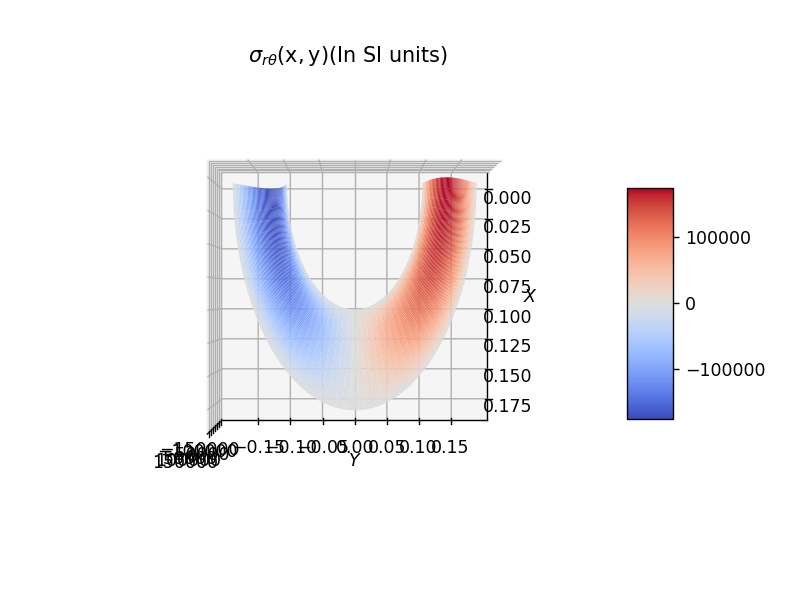

<IPython.core.display.Javascript object>


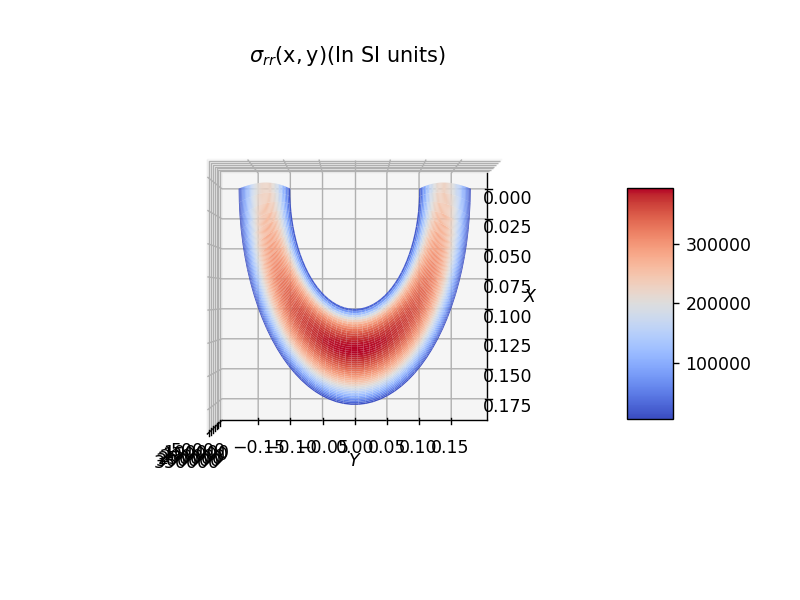

In [199]:
rbar = np.linspace(0.1, 0.18, 50)
tbar = np.linspace(-np.pi/2, np.pi/2, 50)
R, T = np.meshgrid(rbar, tbar)
sigmarr_circplot = -3568377.62*R*np.cos(T) - 2613291.705*np.log(R) - 3795528.322 + 151299.21*np.cos(T)/R - 22217.98/R**2 - 1156.154*np.cos(T)/R**3 
sigmatt_circplot = -2613291.7*np.log(R) - 6408820.02 + 22217.98/R**2 + (-10705132.86*R**4 + 151299.2*R**2 + 1156.15)*np.cos(T)/R**3
sigmart_circplot = -3568377.62*R*np.sin(T) + 151299.2*np.sin(T)/R - 1156.15*np.sin(T)/R**3
X, Y = R*np.cos(T), R*np.sin(T)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.title.set_text(r'$\sigma_{\theta\theta}($x$,$y$)}$(In SI units)')
ax1.set_xlabel('$X$')
ax1.set_ylabel('$Y$')
surf1 = ax1.plot_surface(X,Y,sigmatt_circplot,cmap=plt.cm.coolwarm,linewidth=0) 
plt.colorbar(surf1,shrink=0.5, aspect=5)
ax1.view_init(90,0)


fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.title.set_text(r'$\sigma_{r\theta}($x$,$y$)}$(In SI units)')
ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
surf2 = ax2.plot_surface(X,Y,sigmart_circplot,cmap=plt.cm.coolwarm,linewidth=0) 
plt.colorbar(surf2,shrink=0.5, aspect=5)
ax2.view_init(90,0)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.title.set_text(r'$\sigma_{rr}($x$,$y$)}$(In SI units)')
ax3.set_xlabel('$X$')
ax3.set_ylabel('$Y$')
surf3 = ax3.plot_surface(X,Y,sigmarr_circplot,cmap=plt.cm.coolwarm,linewidth=0) 
plt.colorbar(surf3,shrink=0.5, aspect=5)
ax3.view_init(90,0)

<br>
<br>
<br>

### For rectangular block



#### **Note :** $\sigma_{yy}$ is not plotted because $\sigma_{yy} = 0$

<IPython.core.display.Javascript object>


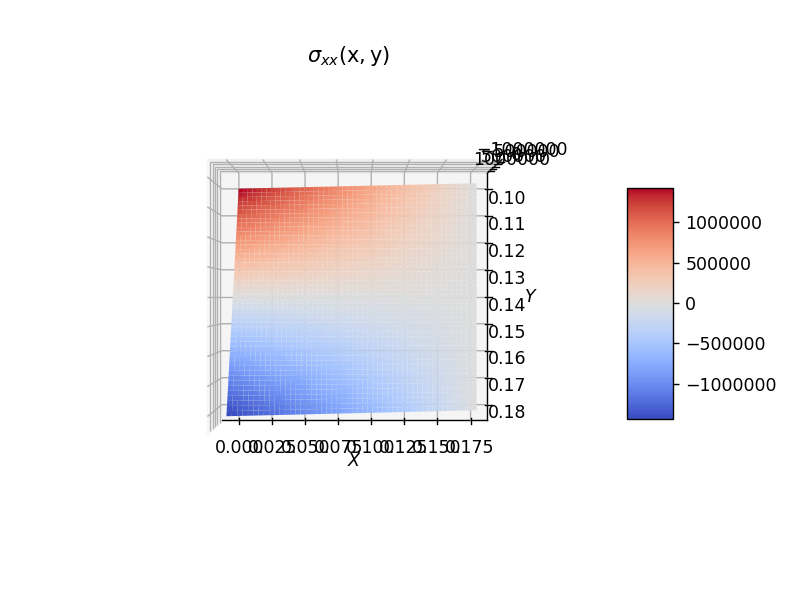

<IPython.core.display.Javascript object>


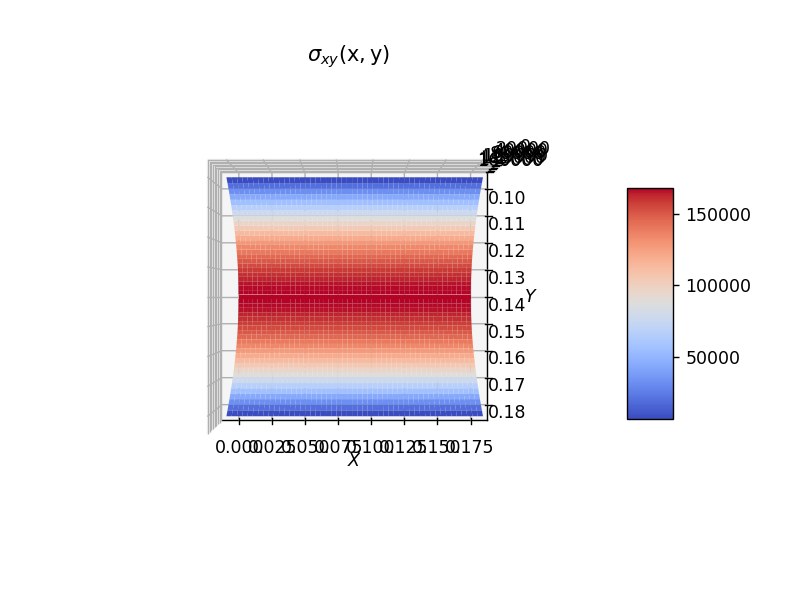

In [200]:
xbar = np.linspace(0, 0.175, 50)
ybar = np.linspace(0.1,0.18, 50)
X, Y = np.meshgrid(xbar, ybar)
sigmaxx_rectplot = 12*0.175*9000*Y/(0.1-0.18)**3 - 6*0.175*9000*(0.1+0.18)/(0.1-0.18)**3 - 12*9000*X*Y/(0.1-0.18)**3 + 6*9000*X*(0.1+0.18)/(0.1-0.18)**3
sigmayy_rectplot = 0
sigmaxy_rectplot = 6*0.1*0.18*9000/(0.1-0.18)**3 + 6*9000*Y**2/(0.1-0.18)**3 - 6*9000*Y*(0.1+0.18)/(0.1-0.18)**3
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.title.set_text(r'$\sigma_{xx}($x$,$y$)}$')
ax4.set_xlabel('$X$')
ax4.set_ylabel('$Y$')
surf4 = ax4.plot_surface(X,Y,sigmaxx_rectplot,cmap=plt.cm.coolwarm,linewidth=0) 
plt.colorbar(surf4,shrink=0.5, aspect=5)
ax4.view_init(-90,-90)


xbar = np.linspace(0, 0.175, 50)
ybar = np.linspace(0.1,0.18, 50)
X, Y = np.meshgrid(xbar, ybar)
sigmaxx_rectplot = 12*0.175*9000*Y/(0.1-0.18)**3 - 6*0.175*9000*(0.1+0.18)/(0.1-0.18)**3 - 12*9000*X*Y/(0.1-0.18)**3 + 6*9000*X*(0.1+0.18)/(0.1-0.18)**3
sigmayy_rectplot = 0
sigmaxy_rectplot = 6*0.1*0.18*9000/(0.1-0.18)**3 + 6*9000*Y**2/(0.1-0.18)**3 - 6*9000*Y*(0.1+0.18)/(0.1-0.18)**3
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.title.set_text(r'$\sigma_{xy}($x$,$y$)}$')
ax4.set_xlabel('$X$')
ax4.set_ylabel('$Y$')
surf4 = ax4.plot_surface(X,Y,sigmaxy_rectplot,cmap=plt.cm.coolwarm,linewidth=0) 
plt.colorbar(surf4,shrink=0.5, aspect=5)
ax4.view_init(-90,-90)